# I. Import Thư Viện

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import cv2
# Nhúng hình ảnh, đồ thị trong notebook
%matplotlib inline

In [2]:
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
from keras.layers.noise import GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

#print(K.image_data_format())
from keras import layers, models, optimizers, metrics, losses
from keras.layers import Input,Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Sử dụng GPU
import tensorflow as tf
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from keras import backend as K 
K.set_image_dim_ordering('tf') #tf: tensorflow
#K.set_image_dim_ordering('th')

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# II. Các Step thực hiện

# Step 1: From ‘Labelled Faces in the Wild’’ dataset, randomly pick up 7,000 faces/images (5000 for training and 2000 for testing)

In [4]:
#def getImage(path, With, High):
#    return load_img(path, target_size=(With, High))

In [5]:
def getImage(path, With, High):
    #Đọc dữ liệu ảnh màu sử dụng thư viện opencv
    #Hàm imread chuyển đổi hình ảnh sang mảng
    #img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    # resize ảnh về cùng kích thước
    resized = cv2.resize(img, (With, High))
    return resized

In [6]:
import glob
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
def load_sequence(folder, SizeImg_With, SizeImg_High):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    Face_Img = []
    lblFace = []
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lables = np.array([10]).astype('uint8')
       # image = load_img(sq,target_size=(SizeImg_With,SizeImg_High))
        image = getImage(sq,SizeImg_With,SizeImg_High)
        #image = img_to_array(image)
        Face_Img.append(image)
        lblFace.append(lables)
    return np.array(Face_Img), lblFace

In [7]:
addressFace = 'C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/lfw/lfw/'

In [8]:
FaceImg, lblFaceImg = load_sequence(addressFace,32,32)

### Hiển thị Image đã Load 

In [9]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(X[k])
            k = k+1
    # show the plot
    plt.show()

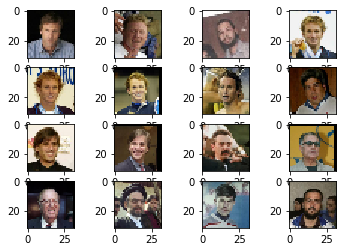

In [10]:
show_imgs(FaceImg)

In [11]:
len(FaceImg)

13233

## Lấy random 7000 Image trong 13233

In [12]:
def GetRandom7000(Face_img,Label_Img, soluong):
    Val_random = np.random.choice(len(Face_img), soluong)
    Face_Img = []
    lblFace = []
    for i in range(len(Val_random)):
        Face_Img.append(Face_img[Val_random[i]])
        lblFace.append(Label_Img[Val_random[i]])
    return Face_Img, lblFace

In [13]:
FaceImg7000, lblFaceImg7000 = GetRandom7000(FaceImg, lblFaceImg,7000)

In [14]:
FaceImg7000 = np.asarray(FaceImg7000) # List to array

In [15]:
FaceImg7000.shape

(7000, 32, 32, 3)

In [16]:
mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
            'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9,'Face': 10}
# Helper function to plot some images in the dataset
def plot_cifar10(x_Data,y_data, class_name=None):
    k=[]
    for i in range(len(y_data)):
        k.append([y_data[i][0]])
    y_data1 = np.array(k).astype('float32')
    if class_name == None:
        fig, ax = plt.subplots(11, 10, sharey=True, figsize=(11,10))
        for j in range(11):
            class_index = (y_data1 == j)[:,0]
            class_imgs = x_Data[class_index,:,:][np.random.choice(5000, 10),:,:]
            for i, img in enumerate(class_imgs):
                ax[j,i].imshow(img)
                ax[j,i].grid('off')
                ax[j,i].set_xticks([])
                ax[j,i].set_yticks([])
                if i == 0:
                    ax[j,i].set_ylabel(list(mapping.keys())[j])
    else:
        class_index = (y_data1== mapping[class_name])[:,0]
        class_imgs = x_Data[class_index,:,:][np.random.choice(5000, 10),:,:]
        fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
        for i, img in enumerate(class_imgs):
            ax[i].imshow(img)
            ax[i].grid('off')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            if i == 0:
                ax[i].set_ylabel(class_name)

## Chia tập train và tập test (5000 for training and 2000 for testing)

In [17]:
X_train_Face, X_test_Face, y_train_Face, y_test_Face = train_test_split(FaceImg7000, lblFaceImg7000, test_size=0.285714, random_state=1)

In [18]:
print(X_train_Face.shape)
print(X_test_Face.shape)

(5000, 32, 32, 3)
(2000, 32, 32, 3)


# Step 2: Combine the faces in Step 1 with CIFAR-10 to have CIFARE-11 dataset: 67000 images in 11 classes.

In [19]:
from keras.datasets import cifar10
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()

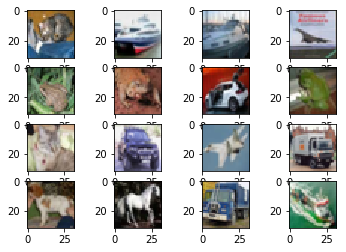

In [20]:
show_imgs(x_test_cifar10[:16])

In [21]:
#x_train_cifar10 = x_train_cifar10.astype('float32')
#x_test_cifar10= x_test_cifar10.astype('float32')

In [22]:
x_train_cifar10.shape

(50000, 32, 32, 3)

In [23]:
#Ghép 2 dữ liệu của Face và CIFAR10
def NewDataTrainTest(Face_Img,lblface_Img,x_cifar10,y_cifar10):
    Img_New=[]
    lbl_New =[]
    for j in range(len(x_cifar10)):
        Img_New.append(x_cifar10[j])
        lbl_New.append(y_cifar10[j])
    for i in range(len(Face_Img)):
        Img_New.append(Face_Img[i])
        lbl_New.append(lblface_Img[i])
    return np.asarray(Img_New), lbl_New

In [24]:
y_train_cifar10[0]

array([6], dtype=uint8)

In [25]:
X_Train_Data, Y_Train_Data = NewDataTrainTest(X_train_Face,y_train_Face,x_train_cifar10,y_train_cifar10)

In [26]:
X_Train_Data.shape

(55000, 32, 32, 3)

In [27]:
X_test_Face.shape

(2000, 32, 32, 3)

In [28]:
y_test_cifar10.shape

(10000, 1)

In [29]:
X_Test_Data, Y_Test_Data = NewDataTrainTest(X_test_Face,y_test_Face,x_test_cifar10,y_test_cifar10)

In [30]:
X_Test_Data.shape

(12000, 32, 32, 3)

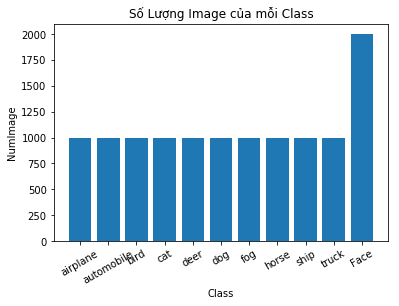

In [31]:
unique, counts = np.unique(Y_Test_Data, return_counts=True)
dataCount = dict(zip(unique, counts))
def CountNumberImage(dict_Data,dict_lbl):
    Val_d=[]
    Val_l=[]
    for k, v in dict_Data.items():
        Val_d.append(int(v))
    for k, v in dict_lbl.items():
        Val_l.append(k)
    return Val_d, Val_l
Val_data, Val_lbl = CountNumberImage(dataCount,mapping)
def plot_bar_x(NumImg,NumLbl):
    # this is for plotting purpose
   # index = np.arange(len(NumLbl))
    index =np.arange(len(NumLbl))
    plt.bar(index, NumImg)
    plt.xlabel('Class', fontsize=10)
    plt.ylabel('NumImage', fontsize=10)
    plt.xticks(index, NumLbl, fontsize=10, rotation=30)
    plt.title('Số Lượng Image của mỗi Class')
    plt.show()
plot_bar_x(Val_data,Val_lbl) 

# Save and Load

In [31]:
np.save('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/X_Train_Data',X_Train_Data)
np.save('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/Y_Train_Data',Y_Train_Data)
np.save('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/X_Test_Data',X_Test_Data)
np.save('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/Y_Test_Data',Y_Test_Data)

In [ ]:
X_Train_Data = np.load('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/X_Train_Data.npy')
Y_Train_Data = np.load('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/Y_Train_Data.npy')
X_Test_Data = np.load('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/X_Test_Data.npy')
Y_Test_Data = np.load('C:/Users/vuong.huynh/Thuc Tap Deep Learning/Week1 - 11-05-2019/Y_Test_Data.npy')

# Step 3: Build a CNN network to classify an image across 11 classes . 

## a. Preprocessing data 

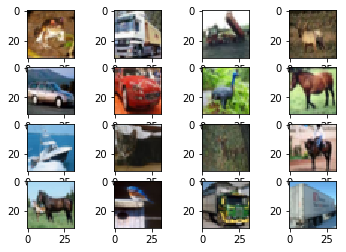

In [28]:
show_imgs(X_Train_Data)

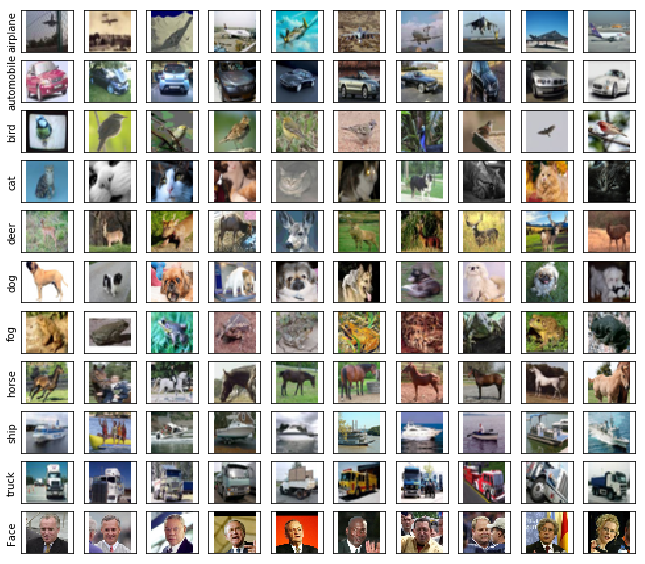

In [29]:
plot_cifar10(X_Train_Data,Y_Train_Data)

In [30]:
# Normalize data
x_train = X_Train_Data.astype('float32') / 255
x_test = X_Test_Data.astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(Y_Train_Data, num_classes=11)
y_test = keras.utils.to_categorical(Y_Test_Data, num_classes=11)

In [ ]:
#BatcNormalization # Dung cho batc-size lon >10
#InstanceNormalization # // Dung cho batc-size lon <10
#GroupNormalization

#Su dung concatenation de ket hop feature tu nhieu convolution layer (Layer input
#Nhung (LayerInput) SpatialDropout

# b. Tạo model CNN

In [38]:
# Model 4 lớp Convolution

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
#cnn_model.add(MaxPooling2D((2, 2),strides=(1, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(Dense(11, activation='softmax'))

In [39]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          9248      
__________

In [40]:
# Configure the optimizer
#Se giam learning-rate di 10 lan khi do loi tren tap validation kong tay doi qua 5 lan lien tiep
reduceCNN = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,mode='auto')
#Dung viec huan luyen khi do loi khong giam qua 10 lan lap lien tiep
earlyCNN = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10,mode='auto')
adam = optimizers.Adam(lr=0.001)
cnn_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
batch_size = 512
nb_epoch = 30

In [42]:
MohinhCNN_Model=cnn_model.fit(x_train, y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(x_test, y_test),callbacks=[reduceCNN,earlyCNN])

Train on 55000 samples, validate on 12000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 105us/step - loss: 2.3957 - acc: 0.1354 - val_loss: 2.1008 - val_acc: 0.2972
Epoch 2/30
55000/55000 [==============================] - 5s 88us/step - loss: 1.9662 - acc: 0.2688 - val_loss: 1.6359 - val_acc: 0.4178
Epoch 3/30
55000/55000 [==============================] - 5s 87us/step - loss: 1.7306 - acc: 0.3447 - val_loss: 1.4560 - val_acc: 0.4488
Epoch 4/30
55000/55000 [==============================] - 5s 90us/step - loss: 1.6063 - acc: 0.3931 - val_loss: 1.3509 - val_acc: 0.5109
Epoch 5/30
55000/55000 [==============================] - 5s 86us/step - loss: 1.5281 - acc: 0.4276 - val_loss: 1.2765 - val_acc: 0.5378
Epoch 6/30
55000/55000 [==============================] - 5s 89us/step - loss: 1.4702 - acc: 0.4466 - val_loss: 1.2489 - val_acc: 0.5420
Epoch 7/30
55000/55000 [==============================] - 5s 88us/step - loss: 1.4241 - acc: 0.4695 - val_loss: 1.2017 - val_ac

In [43]:
def DoThiTiLeLoi(MoHinhSauTrain):
    history_dict = MoHinhSauTrain.history.history
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
  
    epochs = range(1, len(train_loss) + 1)
  
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [44]:
def DoThi_acc(MoHinhSauTrain):
    history_dict = MoHinhSauTrain.history.history
    train_acc = history_dict['acc']
    val_acc = history_dict['val_acc']
  
    epochs = range(1, len(train_acc) + 1)
  
    plt.plot(epochs, train_acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

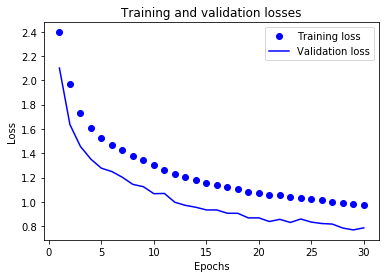

In [46]:
DoThiTiLeLoi(cnn_model)

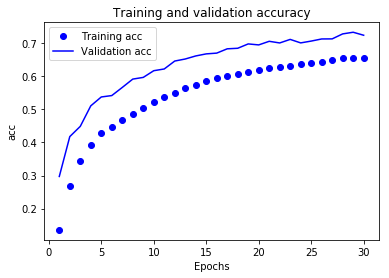

In [47]:
DoThi_acc(cnn_model)

### Đánh giá Model trên toàn tập dữ liệu (Xem lại model train không tốt trên Class nào)

In [264]:
from sklearn.metrics import classification_report

In [265]:
def DuDoanFullData(x,y,MoHinh):
    lblData=[]
    lblPre=[]
    for i in range(len(x)):
        ResultPr = MoHinh.predict(x[i].reshape(1,32, 32,3))
        max_indexImage = np.argmax(ResultPr[0])
        lblData.append(np.argmax(y[i]))
        lblPre.append(max_indexImage)
    return lblData,lblPre

In [258]:
lbl_cnn,lblpred_cnn = DuDoanFullData(x_train,y_train,cnn_model)

In [259]:
print(classification_report(lbl_cnn,lblpred_cnn))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74      5000
          1       0.83      0.83      0.83      5000
          2       0.60      0.54      0.57      5000
          3       0.51      0.53      0.52      5000
          4       0.56      0.74      0.64      5000
          5       0.66      0.47      0.55      5000
          6       0.68      0.85      0.76      5000
          7       0.84      0.66      0.74      5000
          8       0.74      0.89      0.81      5000
          9       0.89      0.72      0.80      5000
         10       1.00      1.00      1.00      5000

avg / total       0.73      0.72      0.72     55000



In [261]:
lbl_cnnT,lblpred_cnnT = DuDoanFullData(x_test,y_test,cnn_model)

In [262]:
print(classification_report(lbl_cnnT,lblpred_cnnT))

             precision    recall  f1-score   support

          0       0.71      0.71      0.71      1000
          1       0.81      0.81      0.81      1000
          2       0.55      0.50      0.52      1000
          3       0.49      0.48      0.48      1000
          4       0.54      0.71      0.61      1000
          5       0.63      0.46      0.53      1000
          6       0.67      0.85      0.75      1000
          7       0.81      0.64      0.71      1000
          8       0.71      0.86      0.77      1000
          9       0.88      0.69      0.77      1000
         10       1.00      1.00      1.00      2000

avg / total       0.73      0.72      0.72     12000



#### Dựa trên kết quả ta thấy các con vật có kích thước nhỏ. Mô hình nhận diện không tốt.
#### ==> Lý do: Có thể qua các lớp Convolution, MaxPooling bị mất thông tin

In [ ]:
4253//50
1630

# c. Tuning Model

In [65]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
#model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model4.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model4.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model4.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model4.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model4.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.25))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model4.add(BatchNormalization())
model1.add(Dense(11, activation='softmax'))
# compile model
#Se giam learning-rate di 10 lan khi do loi tren tap validation kong tay doi qua 5 lan lien tiep
reduceLr1 = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,mode='auto')
#Dung viec huan luyen khi do loi khong giam qua 10 lan lap lien tiep
earlyStop1 = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10,mode='auto')
opt1 = optimizers.Adam(lr=0.001)
#opt4 = optimizers.SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 64)        256       
__________

In [66]:
Trainmodel1 = model1.fit(x_train, y_train, batch_size=1024, epochs=60, verbose=1, validation_data=(x_test, y_test),callbacks=[reduceLr1,earlyStop1])

Train on 55000 samples, validate on 12000 samples
Epoch 1/60
55000/55000 [==============================] - 20s 358us/step - loss: 2.1544 - acc: 0.2383 - val_loss: 1.7807 - val_acc: 0.3592
Epoch 2/60
55000/55000 [==============================] - 15s 281us/step - loss: 1.5838 - acc: 0.4011 - val_loss: 1.4721 - val_acc: 0.4732
Epoch 3/60
55000/55000 [==============================] - 15s 279us/step - loss: 1.3930 - acc: 0.4836 - val_loss: 1.4624 - val_acc: 0.4987
Epoch 4/60
55000/55000 [==============================] - 15s 280us/step - loss: 1.2604 - acc: 0.5370 - val_loss: 1.3175 - val_acc: 0.5300
Epoch 5/60
55000/55000 [==============================] - 15s 280us/step - loss: 1.1426 - acc: 0.5860 - val_loss: 1.0827 - val_acc: 0.6111
Epoch 6/60
55000/55000 [==============================] - 15s 280us/step - loss: 1.0500 - acc: 0.6257 - val_loss: 1.0101 - val_acc: 0.6533
Epoch 7/60
55000/55000 [==============================] - 16s 282us/step - loss: 0.9817 - acc: 0.6509 - val_loss: 0.

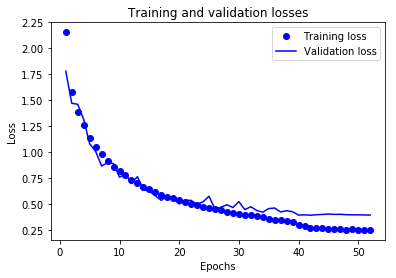

In [68]:
DoThiTiLeLoi(model1)

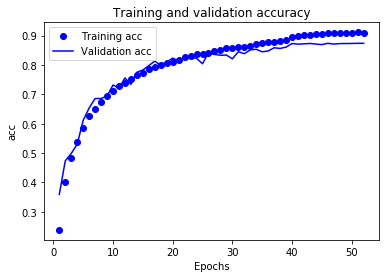

In [69]:
DoThi_acc(model1)

In [269]:
_lblDataFull_model1,_lblPredFull_model1 = DuDoanFullData(x_train,y_train,model1)

In [271]:
#print(classification_report(y_true,y_pred))
print(classification_report(_lblDataFull_model1,_lblPredFull_model1))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      5000
          1       0.99      0.98      0.99      5000
          2       0.97      0.94      0.95      5000
          3       0.91      0.85      0.88      5000
          4       0.93      0.98      0.95      5000
          5       0.89      0.90      0.90      5000
          6       0.94      0.99      0.96      5000
          7       0.97      0.98      0.98      5000
          8       0.99      0.99      0.99      5000
          9       0.98      0.99      0.99      5000
         10       1.00      1.00      1.00      5000

avg / total       0.96      0.96      0.96     55000



In [272]:
_lblDataFull_model1_t,_lblPredFull_model1_t = DuDoanFullData(x_test,y_test,model1)

In [273]:
print(classification_report(_lblDataFull_model1_t,_lblPredFull_model1_t))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86      1000
          1       0.94      0.92      0.93      1000
          2       0.84      0.76      0.80      1000
          3       0.73      0.66      0.69      1000
          4       0.80      0.88      0.84      1000
          5       0.77      0.78      0.77      1000
          6       0.82      0.92      0.87      1000
          7       0.90      0.89      0.89      1000
          8       0.91      0.91      0.91      1000
          9       0.90      0.91      0.91      1000
         10       1.00      1.00      1.00      2000

avg / total       0.87      0.87      0.87     12000



In [197]:
def ImagePredict(path):
    dataPre=[]
    #imgPre = cv2.imread(path,cv2.IMREAD_ANYCOLOR)
    imgPre =getImage(path,32,32)
    #imgPre = img_to_array(imgPre)
    dataPre.append(imgPre)
    dataPredict=np.array(dataPre, dtype=np.uint8)
    dataPredict = np.array(dataPredict, dtype="float") / 255.0
    return dataPredict

In [198]:
def HienThiKetQuaDuDoan(MoHinh,folder,Hang, Cot,NumImage, figsize=(20,10)):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    i=1
    demImage=0
    figs = plt.figure(figsize=figsize)
    NameImage=""
    #for sq in sequence_folder[start:end][:limit]:
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        if i<(Hang*Cot):
            img = cv2.imread(sq,cv2.IMREAD_COLOR)
           #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ResultPr = MoHinh.predict(ImagePredict(sq))
                #ResultPr = MoHinh.predict(ImagePredict(sq))
            max_indexImage = np.argmax(ResultPr[0])
            for k, v in mapping.items():
                if v == max_indexImage: 
                    LabelPred =k
                #LabelPred = str(max_indexImage)
                # Pick the first image for each label.
            plt.subplot(Hang, Cot, i)  # A grid of 8 rows x 8 columns
                #print(i)
            plt.axis('off')
            plt.title(lables+":  "+LabelPred, fontsize=8)
            i += 1
            _ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

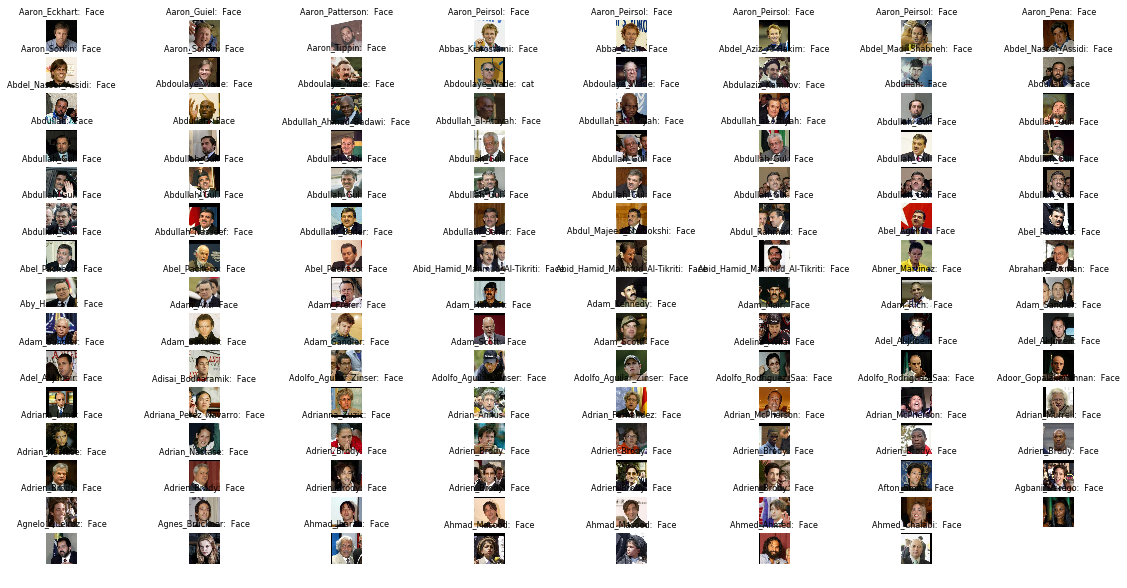

In [199]:
HienThiKetQuaDuDoan(model1,addressFace,15,8,4)